# Import Libraries

In [1]:
!pip install mne
!pip install umap-learn
!pip install pyedflib
!pip install neurokit2
!pip install xgboost

In [2]:
import mne
import pandas as pd
import numpy as np
import scipy as sp
import scipy.io as sio
from scipy.signal import periodogram
import neurokit2 as nk
import pywt
from collections import Counter
from tqdm.notebook import tqdm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
import umap.umap_ as umap
from glob import glob
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import shutil
from scipy.signal import welch
#from utils import *
import logging
import zipfile
import pyedflib
from pyedflib import highlevel
import io
import tempfile

In [3]:
#have to mount drive to access files in google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Define Constants

In [4]:
nSamples = 8000 # number of samples per segment
fs = 400 # sampling rate in Hz
wavelet_name = 'db1' # name of discrete mother wavelet used in Discrete Wavelet Transform

# Import Data Files and Functions


In [5]:
%cd /content/gdrive/Shareddrives/BE_223A_Seizure_Project/Code/seizureai-main/

from dataset import *

/content/gdrive/Shareddrives/BE_223A_Seizure_Project/Code/seizureai-main
/Users/andresmichel/Documents/EGG data /v2.0.0/edf/dev


In [6]:
# In the future this will be a full folder, but for now it will be one edf file

data_file_path  = '/content/gdrive/Shareddrives/BE_223A_Seizure_Project/aaaaaajy_s002_t000.edf'
labels = [0]

In [16]:
# Import functions

# [UPDATE PATH]
%cd  /content/gdrive/Shareddrives/BE_223A_Seizure_Project/Code/

from classical_ml_models import *
from get_features import *
from train_test_tune import *
from cnn import *
from rnn import *
from validate import *

/content/gdrive/Shareddrives/BE_223A_Seizure_Project/Code


# Preprocessing

Extracting EDF parameters from /content/gdrive/Shareddrives/BE_223A_Seizure_Project/aaaaaajy_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7999  =      0.000 ...    19.997 secs...
None
The following channels are not in the standard_1020 montage: ['Ekg', 'T1', 'T2', 'Sp1', 'Sp2', 'Luc', 'Resp1', 'Resp2', '31', '32']. These channels will be set to 'misc'.
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=26, n_times=8000
    Range : 0 ... 7999 =      0.000 ...    19.997 secs
Ready.
Added the following bipolar channels:
Fp1-F7, F7-T3, Fp2-F8, F8-T4, T3-T5, T5-O1, T4-T6, T6-O2, F3-C3, C3-P3, F4-C4, C4-P4, Fz-Cz, Cz-Pz, Fp1-F3, Fp2-F4, T3-C3, T4-C4, P3-O1, P4-O2, F3-Fz, Fz-F4, C3-Cz, Cz-C4, P3-Pz, Pz-P4
Channels to drop: []
Existing channels: ['Ekg', 'A1', 'A2', 'T1', 'T2', 'Sp1', 'Sp2', 'Luc', 'Resp1', 'Resp2', '31', '32', 'Fp1-F7', 'F7-T3', 'Fp2-F8', 'F8-T4', 'T3-T5', 'T5-O1', 'T

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 2641 samples (6.603 s)

Removed Fp1, Fp2, Fz, Cz, Pz, Ekg, T1, T2, Sp1, Sp2, Luc, Resp1, Resp2, 31, 32 from the data.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Up

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 16.0s.
Using EOG channels: F7, F8, T3, T4, T5, T6, A1, A2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 4000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

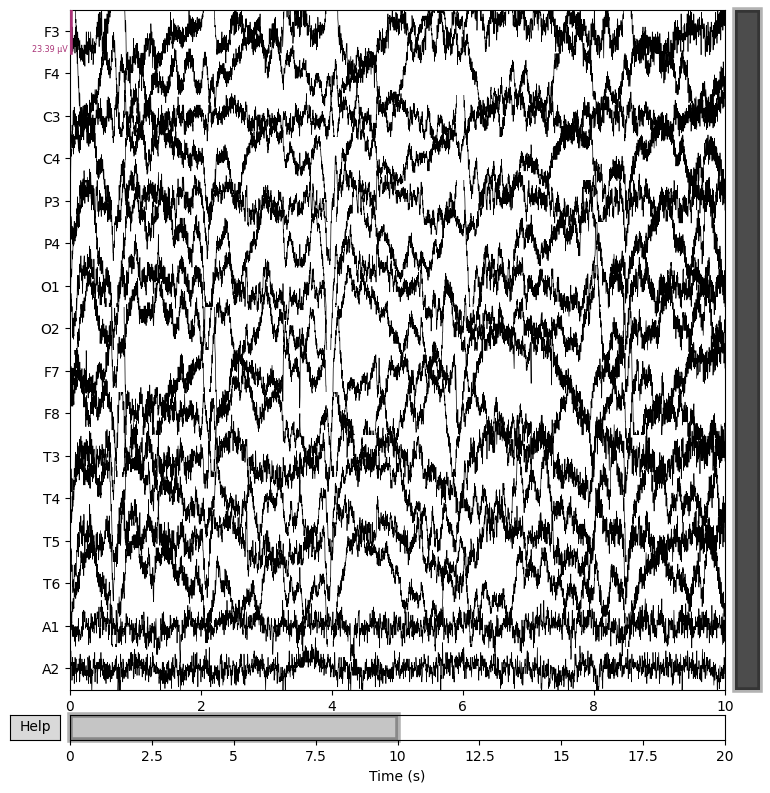

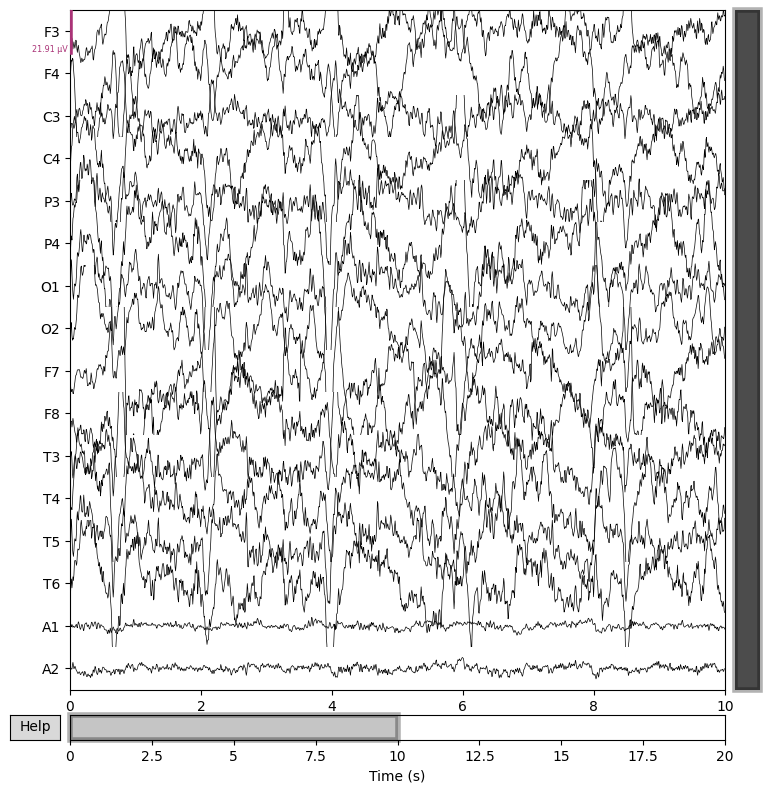

(32, 8000)
256000
[[ 3.06025394e+01  2.25045143e+01  2.16047337e+01 ... -1.07873669e+01
  -4.48890286e+00 -4.48890286e+00]
 [ 7.73911292e+01  6.83933235e+01  6.56939817e+01 ... -1.16871474e+01
  -8.98780572e+00 -8.08802515e+00]
 [ 1.62060503e+01  7.20824458e+00  1.26069280e+01 ... -8.89780572e-01
   4.50890286e+00  5.40868343e+00]
 ...
 [ 1.00000000e-02 -7.18824458e+00 -1.16871474e+01 ...  4.05001257e+01
   4.76983703e+01  4.31994675e+01]
 [ 1.00000000e-02 -4.48890286e+00 -1.78956114e+00 ...  3.15023200e+01
   3.69010034e+01  3.69010034e+01]
 [-5.38868343e+00 -3.58912229e+00 -1.78956114e+00 ...  1.00000000e-02
  -8.89780572e-01 -2.68934172e+00]]


In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

eeg_data_pair = EEGDataPair(data_file_path)

# Store the original raw for visualization
raw_before = eeg_data_pair.raw.copy()

# Run the preprocessing pipeline
edf_file = eeg_data_pair.processing_pipeline()

# Channels that are present after preprocessing
common_chs = [ch for ch in raw_before.ch_names if ch in eeg_data_pair.raw.ch_names]

# Same chanels for both plots
raw_before.pick_channels(common_chs)
eeg_data_pair.raw.pick_channels(common_chs)

# Visualize EEG data BEFORE preprocessing
raw_before.plot(title="Before Preprocessing", n_channels=20, scalings="auto", show=True)

# Visualize EEG data AFTER preprocessing
eeg_data_pair.raw.plot(title="After Preprocessing", n_channels=20, scalings="auto", show=True)

print(edf_file.shape)

print(edf_file.size)

print(edf_file)



# Machine Learning Models


In [9]:
# Models imported for validation in earlier cell

### Feature Extraction


In [17]:
# %cd  /content/gdrive/Shareddrives/BE_223A_Seizure_Project/Code/

# from get_features import *
features = get_features(edf_file, wavelet_name)

  0%|          | 0/32 [00:00<?, ?it/s]

In [18]:
features.shape

(32, 177)

### Train and Test Models for Hyperparameter Tuning


In [19]:
# Change directory to where your dataset.py file is located
# %cd /content/drive/Shareddrives/BE_223A_Seizure_Project/Code/

# from train_test_tune import *

# Inputs: numpy array of data (size: [# files, 32 channels, 177 features])
#         numpy array of labels (size: [# files, 1]) -- Epilepsy or No Epilepsy
#         numpy array of patient ID per file (size: [# files, 1])

# Adding extra fake data to extracted features to simulate having more than one file
data_rand = np.random.rand([24, 32, 177])
data = np.concatenate((features, data_rand), axis=0)
labels = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
groups = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4])

[params, best_params] = train_test_tune(data, labels, groups)

svc_params = best_params[0]
rf_params = best_params[1]
kmeans_params = best_params[2]
xg_params = best_params[3]

Cross validate to determine optimal feature selection and model hyperparameters


# Deep Learning Models


### CNN

In [13]:
#change directory to where python deep learning file is
#drive.mount("/content/gdrive", force_remount=True)

# %cd  /content/gdrive/Shareddrives/BE_223A_Seizure_Project/Code/

# from cnn import *
data = [0, 1, 2]
labels = [1, 0, 0]

weights = run_CNN(edf_file, labels)
#print("CNN successfully built")
print(weights)


CNN created
[0, 2, 3, 4]


### RNN

In [14]:
# %cd  /content/gdrive/Shareddrives/BE_223A_Seizure_Project/Code/

# from rnn import *

data = [0,1,2]
labels = [1,0,0]
val_data = [0,1,0]
parameters = [1,2,3]

rnn_pred = rnn_model(data,labels,val_data,parameters)

Working Model


# Validation


In [20]:
# %cd  /content/gdrive/Shareddrives/BE_223A_Seizure_Project/Code/

# from validate import *

# data:(# of samples, 32 channels, 177 features)
# labels: (# of samples)

# 3/4 of total data that has been used for training of the model
train_data = np.zeros([15, 32, 177])
train_labels = np.zeros(15)

# 1/4 of total data that was put aside at the start
validation_data = np.zeros([5, 32, 177])
validation_labels = np.zeros(5)

# model parameters (SVM, RF, XG Boost, Kmeans, UMAP)
parameters = best_params

validate(train_data, train_labels, validation_data, validation_labels, parameters)

The model with the highest validation accuracy is XX


[]